<a href="https://colab.research.google.com/github/SophieShin/DeepLearning/blob/main/%5BAIM5004%5DAssignment_1(SoheeShin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Implementation of MLP (Multilayer Perceptron).



#### (a)Download MNIST dataset from http://yann.lecun.com/exdb/mnist/ and report the statistics of the dataset, e.g. how many training (and testing) images, the size of each image, the number of class and the number of images per each classes. Normalize data to [0, 1] if necessary. Show random 3 images per each class

In [130]:
!wget -q -r -A '*ubyte.gz' --no-parent  'http://yann.lecun.com/exdb/mnist/'
!rm -rf DATA
!mkdir DATA
!mv yann.lecun.com/exdb/mnist/* DATA/
!rm -rf yann.lecun.com
!gunzip DATA/*

!ls DATA

t10k-images-idx3-ubyte	train-images-idx3-ubyte
t10k-labels-idx1-ubyte	train-labels-idx1-ubyte


In [4]:
!pip3 install -q idx2numpy
!pip3 install -q --upgrade --force-reinstall matplotlib

     |████████████████████████████████| 11.2 MB 5.4 MB/s 
     |████████████████████████████████| 247 kB 47.6 MB/s 
     |████████████████████████████████| 98 kB 6.8 MB/s 
     |████████████████████████████████| 1.1 MB 43.0 MB/s 
     |████████████████████████████████| 899 kB 42.9 MB/s 
     |████████████████████████████████| 4.3 MB 36.1 MB/s 
     |████████████████████████████████| 40 kB 4.1 MB/s 
     |████████████████████████████████| 15.7 MB 32.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
arviz 0.11.4 requires typing-extensions<4,>=3.7.4.3, but you have typing-extensions 4.1.1 w

In [131]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [132]:
# loading the data

x_train_all = idx2numpy.convert_from_file('DATA/train-images-idx3-ubyte')
y_train_all = idx2numpy.convert_from_file('DATA/train-labels-idx1-ubyte')

x_test = idx2numpy.convert_from_file('DATA/t10k-images-idx3-ubyte')
y_test = idx2numpy.convert_from_file('DATA/t10k-labels-idx1-ubyte')

In [133]:
# training/test features/target size
print(f'X_train: {x_train_all.shape}')
print(f'X_test: {x_test.shape}')
print(f'y_train: {y_train_all.shape}')
print(f'y_test: {y_test.shape}')

X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
y_train: (60000,)
y_test: (10000,)


In [134]:
# size of each image
x_train_all[0].shape

(28, 28)

In [135]:
# number of classes

np.unique(y_test)

# 10 classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [136]:
# number of data in each class of training sample
import collections
collections.Counter(y_train_all)

Counter({0: 5923,
         1: 6742,
         2: 5958,
         3: 6131,
         4: 5842,
         5: 5421,
         6: 5918,
         7: 6265,
         8: 5851,
         9: 5949})

In [138]:
# Normalizing features
x_train_all = x_train_all/x_train_all.max()
x_test = x_test/x_test.max()

In [139]:
!pip install matplotlib==3.1.1

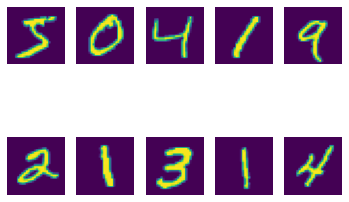

In [140]:
# show random 10 images
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train_all[i])
  plt.subplots_adjust(hspace=0.5)
  plt.axis('off')


#### (b) Implement a MLP architecture and write forward pass. You need to implement all following layers, ReLU activation function, and softmax function. You should also implement cross-entropy loss function.


In [141]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [142]:
#flattening
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)

In [143]:
# one-hot-encoding
import tensorflow
import keras

y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_val_encoded = tf.keras.utils.to_categorical(y_val, num_classes = 10)
print(y_train_encoded.shape, y_val_encoded.shape)
print(y_train_encoded[0])
print(y_val_encoded[0])

(48000, 10) (12000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# relu의 backpropagation 구현이 어려워 sigmoid를 actication function으로 하였습니다.

In [196]:
class MultiClassNetwork:
    
    def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
        self.units = units         
        self.batch_size = batch_size    
        self.w1 = None            
        self.b1 = None             
        self.w2 = None             
        self.b2 = None             
        self.a1 = None             
        self.losses = []           
        self.val_losses = []       
        self.lr = learning_rate    
        self.l1 = l1               
        self.l2 = l2               

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        
        self.a1 = self.sigmoid(z1)               
        z2 = np.dot(self.a1, self.w2) + self.b2  
        return z2

    def backprop(self, x, err):
        m = len(x)       
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad
    
    def relu(self, z):
        return np.maximum(0,z)

    def sigmoid(self, z):
        z = np.clip(z, -100, None)            
        a = 1 / (1 + np.exp(-z))             
        return a
    
    def softmax(self, z):
        z = np.clip(z, -100, None)            
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)
 
    def init_weights(self, n_features, n_classes):
        self.w1 = np.random.normal(0, 1, 
                                   (n_features, self.units))  
        self.b1 = np.zeros(self.units)                       
        self.w2 = np.random.normal(0, 1, 
                                   (self.units, n_classes))  
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape[1], y.shape[1])    
        for i in range(epochs):
            loss = 0
            print('.', end='')
            for x_batch, y_batch in self.gen_batch(x, y):
                a = self.training(x_batch, y_batch)
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += np.sum(-y_batch*np.log(a))
            self.losses.append((loss + self.reg_loss()) / len(x))
            self.update_val_loss(x_val, y_val)

    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size
        if length % self.batch_size:
            bins += 1                   
        indexes = np.random.permutation(np.arange(len(x)))
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]  
            
    def training(self, x, y):
        m = len(x)                
        z = self.forpass(x)      
        a = self.softmax(z)      
        err = -(y - a)          
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
   
    def predict(self, x):
        z = self.forpass(x)         
        return np.argmax(z, axis=1)  
    
    def score(self, x, y):
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def reg_loss(self):
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            
        a = self.softmax(z)                
        a = np.clip(a, 1e-10, 1-1e-10)     
        val_loss = np.sum(-y_val*np.log(a))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))

...............

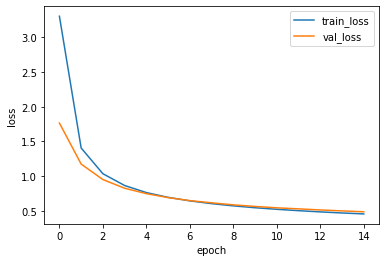

In [197]:
fc = MultiClassNetwork(units=128, batch_size=256)
fc.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=15)

plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

####(c) Implement backward pass to compute the gradients w.r.t the parameters. You should check the correctness of your implementation by either (1) using finite difference or (2) using the existing deep learning libraries. Please provide checking codes in the report .


In [167]:
a = torch.from_numpy(x_train[0])
a = torch.tensor(a,requires_grad=True).float()
w1 = torch.randn(128, 784).float() 
b1 = torch.randn(128).float()           
w2 = torch.randn(10, 128).float() 
b2 = torch.randn(10).float() 

relu = nn.ReLU()
softmax = nn.Softmax()

z1 = torch.matmul(w1,a) +b1
a1 = relu(z1)    
z2 = torch.matmul(w2,a1) + b2  
a2 = relu(z2)
final = softmax(a2)

eps=1e-7
log_final = torch.log(final+eps)

y = torch.from_numpy(y_train_encoded[0])
loss = - torch.dot(y, log_final)


loss.backward()
print(loss)
print(a.grad)

tensor(16.1181, grad_fn=<NegBackward0>)
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered intern

#### (d) Implement a stochastic gradient descent (SGD) algorithm and train your model. Please provide training and validation loss curves in a single plot.


..........

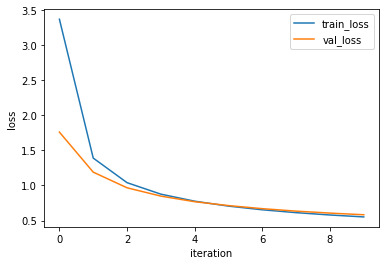

In [172]:
fc_sgd = MultiClassNetwork(units=128, batch_size=1)
fc_sgd.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=10)

plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

#### (e) Train with different hyperparameters. Try at least 5 different learning rates and minibatch sizes. Plot training and validation curves for all different configurations in a single plot.

....................

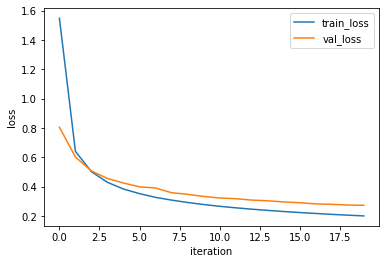

In [178]:
fc = MultiClassNetwork(units=128, batch_size=256, learning_rate = 0.5)
fc.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=20)

plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

....................

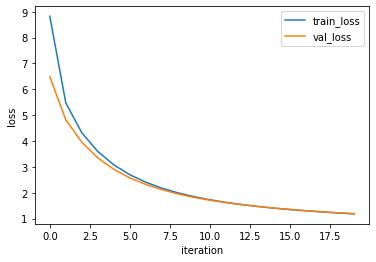

In [180]:
fc = MultiClassNetwork(units=128, batch_size=256, learning_rate = 0.01)
fc.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=20)

plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

....................

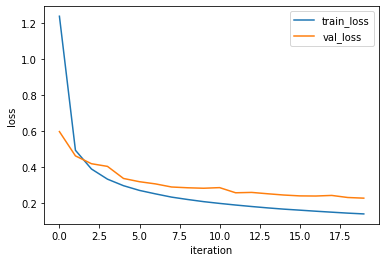

In [181]:
fc = MultiClassNetwork(units=128, batch_size=256, learning_rate = 1)
fc.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=20)

plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

....................

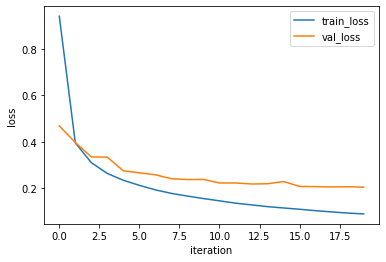

In [182]:
fc = MultiClassNetwork(units=128, batch_size=128, learning_rate = 1)
fc.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=20)

plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

....................

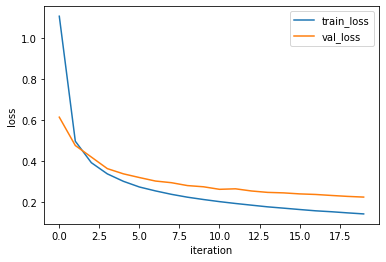

In [183]:
fc = MultiClassNetwork(units=128, batch_size=128, learning_rate = 0.5)
fc.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=20)

plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()